Bayesian Network to model the influence of various cyber features in intrusion detection

In [1]:
import pandas as pd
import numpy as np
from pgmpy.estimators import ExhaustiveSearch,HillClimbSearch,K2Score, PC,TreeSearch

In [2]:
use_case ='UC3'
path_dataset = 'C:\\Users\\substationc\\Desktop\\DataFusion\\DataFusionApp\\DataFusionApp\\PythonScripts\\csvs\\'+use_case

master_file = path_dataset+'\\uc3_merged_phy_cyb_10os_30poll_encoded.csv'
os_file = path_dataset+'\\uc3_DS_merged_phy_cyb_10os_30poll_encoded.csv'
router_file = path_dataset+'\\uc3_router_merged_phy_cyb_10os_30poll_encoded.csv'

In [3]:
master_data = pd.read_csv(master_file)
os_data = pd.read_csv(os_file)
router_data = pd.read_csv(router_file)

In [4]:
master_data['Time'] = master_data['Time'].astype(str)
master_data['Time'] = pd.to_datetime(master_data['Time'], format ='%Y-%m-%d %H:%M:%S.%f')
#master_data['Time'] = pd.to_datetime(master_data['Time']).values.astype(np.int64)// 10**6

os_data['Time'] = os_data['Time'].astype(str)
os_data['Time'] = pd.to_datetime(os_data['Time'], format ='%Y-%m-%d %H:%M:%S.%f')
#os_data['Time'] = pd.to_datetime(os_data['Time']).values.astype(np.int64)// 10**6

router_data['Time'] = router_data['Time'].astype(str)
router_data['Time'] = pd.to_datetime(os_data['Time'], format ='%Y-%m-%d %H:%M:%S.%f')
#router_data['Time'] = pd.to_datetime(router_data['Time']).values.astype(np.int64)// 10**6

In [5]:
master_data.head(5)

,Unnamed: 0,frame_len,frame_protocols,eth_src,eth_dst,ip_src,ip_dst,ip_len,ip_flags,tcp_srcport,...,AL_dnp3_al_ctl,AL_dnp3_obj,DNP3 Object Count,DNP3 Objects,AL_Payload,value1,value2,value3,value4,value5
0,0,72,1,1,0,1,2,11,1,2,...,6,1,55,2,83,NaN,NaN,79.8731,NaN,NaN
1,1,286,1,0,1,2,1,9,1,1,...,0,1,42,1,19,NaN,NaN,79.8731,NaN,1236.1
2,2,72,1,1,0,1,2,11,1,6,...,4,1,33,0,196,NaN,NaN,79.8731,1005.24,1236.1
3,3,239,1,0,1,2,1,7,1,1,...,13,2,36,511,293,NaN,NaN,79.8731,1005.24,1236.1
4,4,72,1,1,0,1,2,11,1,4,...,1,1,38,1,262,NaN,1211.67,79.8731,1005.24,1236.1


In [6]:
# rename the column name of each table to merge 
master_data.columns = ['M'+col_name for col_name in master_data.columns]
os_data.columns = ['O'+col_name for col_name in os_data.columns]
router_data.columns = ['R'+col_name for col_name in router_data.columns]

In [7]:
# join all the table with a resolution of 10 sec
master_data = master_data.set_index('MTime')
os_data = os_data.set_index('OTime')
router_data = router_data.set_index('RTime')
master_resample = master_data.resample('10S').mean()
os_resample = os_data.resample('10S').mean()
router_resample = router_data.resample('10S').mean()
res = master_resample.join(os_resample)
res = res.join(router_resample)

In [8]:
res

,MUnnamed: 0,Mframe_len,Mframe_protocols,Meth_src,Meth_dst,Mip_src,Mip_dst,Mip_len,Mip_flags,Mtcp_srcport,...,RTL_dnp3_tr_ctl,RAL_dnp3_al_func,RAL_dnp3_al_ctl,RAL_dnp3_obj,RDNP3 Object Count,RAL_Payload,Rvalue1,Rvalue2,Rvalue3,Rvalue4
MTime,,,,,,,,,,,,,,,,,,,,,
2020-10-17 16:23:40,1.5,167.250000,1.000000,0.500000,0.500000,1.500000,1.500000,9.500000,1.000000,2.500000,...,0.0,129.0,5.666667,1.333333,37.000000,172.000000,NaN,NaN,NaN,1350.5500
2020-10-17 16:23:50,7.0,132.428571,1.000000,0.571429,0.428571,1.428571,1.571429,8.428571,1.000000,4.142857,...,0.0,129.0,7.142857,1.714286,31.285714,182.857143,-56.257100,1211.670000,NaN,1350.5500
2020-10-17 16:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-17 16:24:10,13.0,155.000000,1.000000,0.400000,0.600000,1.600000,1.400000,7.200000,1.000000,3.000000,...,0.0,129.0,6.000000,1.000000,33.400000,120.600000,-56.257100,1211.670000,79.8731,1350.5500
2020-10-17 16:24:20,19.0,117.000000,0.857143,0.428571,0.571429,1.285714,1.285714,8.714286,0.857143,4.285714,...,0.0,129.0,6.428571,1.285714,31.285714,139.857143,-56.353500,1204.460000,79.8731,1350.5500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-17 16:37:40,306.0,42.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,129.0,9.000000,1.000000,55.000000,71.000000,-0.934492,1233.590000,81.4584,43.2023
2020-10-17 16:37:50,309.5,153.833333,1.000000,0.500000,0.500000,1.500000,1.500000,8.500000,1.000000,3.333333,...,0.0,129.0,5.666667,1.500000,34.666667,201.500000,-0.934492,1229.293333,81.4584,1223.8800
2020-10-17 16:38:00,314.5,139.500000,1.000000,0.500000,0.500000,1.500000,1.500000,7.750000,1.000000,2.250000,...,0.0,129.0,9.500000,1.750000,30.500000,144.250000,-68.920000,1220.700000,81.4584,1223.8800


In [9]:
# analysing the relationship based on source and destination IP address of all the nodes
res_phy = res[['Mvalue1','Ovalue1','Rvalue1','Rvalue2','Mvalue2','Ovalue2']]
res_phy = res_phy.dropna()
res_phy

,Mvalue1,Ovalue1,Rvalue1,Rvalue2,Mvalue2,Ovalue2
MTime,,,,,,
2020-10-17 16:23:50,-56.257100,-56.257100,-56.257100,1211.670000,1211.670000,1211.670000
2020-10-17 16:24:10,-56.257100,-56.257100,-56.257100,1211.670000,1211.670000,1211.670000
2020-10-17 16:24:20,-56.353500,-56.353500,-56.353500,1204.460000,1204.460000,1204.460000
2020-10-17 16:24:40,-56.425800,-56.425800,-56.425800,1204.460000,1204.460000,1204.460000
2020-10-17 16:24:50,-56.406229,-56.406229,-56.406229,1201.010000,1201.010000,1201.010000
...,...,...,...,...,...,...
2020-10-17 16:37:10,-46.287400,-46.287400,-46.287400,1252.450000,1252.450000,1252.450000
2020-10-17 16:37:20,-46.287400,-46.287400,-46.287400,1246.163333,1246.163333,1246.163333
2020-10-17 16:37:30,-0.934492,-0.934492,-0.934492,1233.590000,1233.590000,1233.590000


<AxesSubplot:xlabel='MTime'>

<Figure size 1080x504 with 0 Axes>

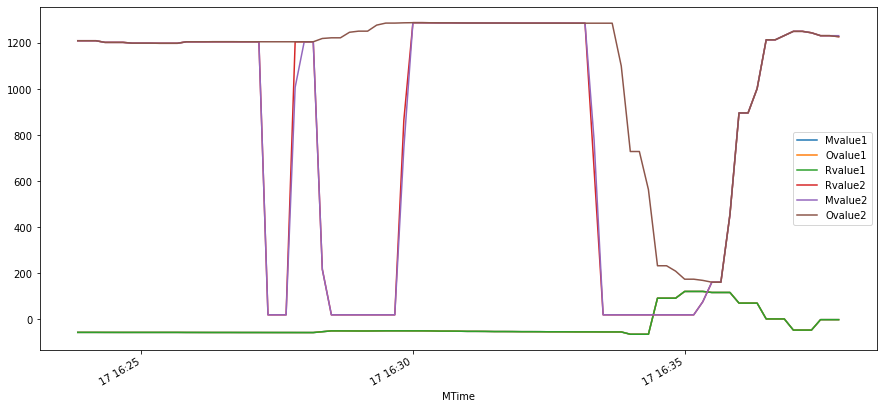

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
res_phy.plot(figsize=(15,7))

In [11]:
# Lets discretise the values to 3 boundaries
CATS = 2

def boundary_str(start,end,cat):
    return f'{cat}: {start:+0,.2f} to {end:+0,.2f}'

def relabel(v,boundaries):
    if v>=boundaries[0][0] and v <=boundaries[0][1]:
        return boundary_str(boundaries[0][0], boundaries[0][1],cat='A')
    elif v>=boundaries[1][0] and v <=boundaries[1][1]:
        return boundary_str(boundaries[1][0], boundaries[1][1],cat='B')
#     elif v>=boundaries[2][0] and v <=boundaries[2][1]:
#         return boundary_str(boundaries[2][0], boundaries[2][1],cat='C')
    else:
        return np.nan

def get_boundaries(cats):
    prev_cat = cats[0]
    boundaries = [(prev_cat[0],prev_cat[prev_cat.shape[0]-1])]
    for index,cat in enumerate(cats):
        if index is not 0:
            boundaries.append((prev_cat[prev_cat.shape[0]-1], cat[cat.shape[0]-1]))
            prev_cat = cat
    return boundaries

new_columns= {}
for i, content in enumerate(res_phy.items()):
    (label,series) = content
    vals = np.sort(np.array([x for x in series.tolist()],dtype=float))
    boundaries = get_boundaries(cats=np.array_split(vals,CATS))
    new_columns[label] =[relabel(val,boundaries) for val in series.tolist()]
    
discrete_dt = pd.DataFrame(data=new_columns)
discrete_dt

<>:21: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:21: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-11-8d52da85637c>:21: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if index is not 0:


,Mvalue1,Ovalue1,Rvalue1,Rvalue2,Mvalue2,Ovalue2
0,A: -64.41 to -52.63,A: -64.41 to -52.63,A: -64.41 to -52.63,"B: +1,207.08 to +1,290.08","B: +1,204.46 to +1,290.08","A: +161.95 to +1,221.46"
1,A: -64.41 to -52.63,A: -64.41 to -52.63,A: -64.41 to -52.63,"B: +1,207.08 to +1,290.08","B: +1,204.46 to +1,290.08","A: +161.95 to +1,221.46"
2,A: -64.41 to -52.63,A: -64.41 to -52.63,A: -64.41 to -52.63,"A: +20.00 to +1,207.08","A: +20.00 to +1,204.46","A: +161.95 to +1,221.46"
3,A: -64.41 to -52.63,A: -64.41 to -52.63,A: -64.41 to -52.63,"A: +20.00 to +1,207.08","A: +20.00 to +1,204.46","A: +161.95 to +1,221.46"
4,A: -64.41 to -52.63,A: -64.41 to -52.63,A: -64.41 to -52.63,"A: +20.00 to +1,207.08","A: +20.00 to +1,204.46","A: +161.95 to +1,221.46"
...,...,...,...,...,...,...
74,B: -52.63 to +121.72,B: -52.63 to +121.72,B: -52.63 to +121.72,"B: +1,207.08 to +1,290.08","B: +1,204.46 to +1,290.08","B: +1,221.46 to +1,290.08"
75,B: -52.63 to +121.72,B: -52.63 to +121.72,B: -52.63 to +121.72,"B: +1,207.08 to +1,290.08","B: +1,204.46 to +1,290.08","B: +1,221.46 to +1,290.08"
76,B: -52.63 to +121.72,B: -52.63 to +121.72,B: -52.63 to +121.72,"B: +1,207.08 to +1,290.08","B: +1,204.46 to +1,290.08","B: +1,221.46 to +1,290.08"
77,B: -52.63 to +121.72,B: -52.63 to +121.72,B: -52.63 to +121.72,"B: +1,207.08 to +1,290.08","B: +1,204.46 to +1,290.08","B: +1,221.46 to +1,290.08"


Bayesian Inference given a prior network model

In [12]:
# lets create a simple prior model in mind
from pgmpy.models import BayesianModel
from pgmpy.estimators import BayesianEstimator, MaximumLikelihoodEstimator
from IPython.core.display import display,HTML

display(HTML('<style>div.output_area pre {white-space: pre;}</style>'))

model = BayesianModel([('Rvalue1','Ovalue1'),('Rvalue1','Mvalue1'),('Rvalue2','Ovalue2'),
                       ('Rvalue2','Mvalue2')])

model.cpds=[]
model.fit(data=discrete_dt, estimator=BayesianEstimator,
         prior_type='BDeu',complete_samples_only=False)
for cpd in model.get_cpds():
    print(f'CPT of {cpd.variable}:')
    print(cpd,'\n')

CPT of Rvalue1:
+-------------------------------+----------+
| Rvalue1(A: -64.41 to -52.63)  | 0.505952 |
+-------------------------------+----------+
| Rvalue1(B: -52.63 to +121.72) | 0.494048 |
+-------------------------------+----------+ 

CPT of Ovalue1:
+-------------------------------+------------------------------+-------------------------------+
| Rvalue1                       | Rvalue1(A: -64.41 to -52.63) | Rvalue1(B: -52.63 to +121.72) |
+-------------------------------+------------------------------+-------------------------------+
| Ovalue1(A: -64.41 to -52.63)  | 0.9705882352941176           | 0.030120481927710843          |
+-------------------------------+------------------------------+-------------------------------+
| Ovalue1(B: -52.63 to +121.72) | 0.029411764705882353         | 0.9698795180722891            |
+-------------------------------+------------------------------+-------------------------------+ 

CPT of Mvalue1:
+-------------------------------+-----------

C:\ProgramData\Anaconda3\lib\site-packages\pgmpy\models\BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


Structure Learning without any given model, using Chow Liu Tree Algorithm

In [13]:
est = TreeSearch(discrete_dt)
dag = est.estimate(estimator_type='chow-liu')
print(dag.edges())

Building tree:   0%|          | 0/15.0 [00:00<?, ?it/s]

[('Rvalue1', 'Mvalue1'), ('Mvalue1', 'Ovalue1'), ('Mvalue1', 'Ovalue2'), ('Ovalue2', 'Rvalue2'), ('Rvalue2', 'Mvalue2')]


Structure Learning without any given model, using Tree-Augmented Naive Bayes (TAN) structure from Data

In [14]:
est = TreeSearch(discrete_dt)
dag = est.estimate(estimator_type='tan')
print(dag.edges())

Building tree:   0%|          | 0/15.0 [00:00<?, ?it/s]

[('Rvalue1', 'Mvalue1'), ('Mvalue1', 'Ovalue2'), ('Ovalue2', 'Rvalue2'), ('Rvalue2', 'Mvalue2'), ('Ovalue1', 'Mvalue1'), ('Ovalue1', 'Rvalue1'), ('Ovalue1', 'Rvalue2'), ('Ovalue1', 'Mvalue2'), ('Ovalue1', 'Ovalue2')]


Structure Learning without any given model, using Hill Climbing Search Algo

In [15]:
scoring_method = K2Score(data=discrete_dt)
est = HillClimbSearch(data= discrete_dt)
est_model = est.estimate(scoring_method=scoring_method,max_iter=1e3,max_indegree=4)
print(est_model.edges())

  0%|          | 0/1000 [00:00<?, ?it/s]

[('Mvalue1', 'Ovalue1'), ('Ovalue1', 'Ovalue2'), ('Rvalue1', 'Mvalue1'), ('Rvalue2', 'Mvalue2'), ('Rvalue2', 'Ovalue2')]


In [16]:
est = PC(data=discrete_dt)
est_model = est.estimate(variant='orig')
print(est_model.edges())

  0%|          | 0/5 [00:00<?, ?it/s]

[('Ovalue1', 'Mvalue1'), ('Rvalue1', 'Mvalue1'), ('Rvalue1', 'Ovalue1'), ('Rvalue2', 'Mvalue2')]


Structure Learning with Exhaustive Search

In [ ]:
est = ExhaustiveSearch(discrete_dt)
for score,model in est.all_scores():
    print(score,model.edges())